# C, Python e Compilazione Just in Time

## Esercizio 1

La successione di Fibonacci è legata alla sezione aurea: 

$$
\lim_{n \rightarrow \inf} \frac{F_{n+1}}{F_n} = \varphi
$$

I termini $F_n$ della successione di Fibinaci sono numeri interi ricavabili tramite la  seguente regola:

$$
F_n = 
\begin{cases}
1  &:& n = 1 \\
1  &:& n = 2 \\
F_{n-2}+F_{n-1} &:& n > 2\\
\end{cases}
$$



### Richieste

1. Produrre la libreria condivisa `serie` (`libserie.so`) in cui sia definita la funzione `fibonacci` che:
    1. accetti in ingresso il numero intero `n`;
    2. calcoli i valori della successione di Fibonacci fino la termine $F_n$ e restitisca il valore $\frac{F_{n}}{F_{n-1}}$;
2. Produrre il modulo  python (`serie.py`)che:
    1. tramite `ctypes` usi la libreria condivisa `libserie.so`;
    2. definisca la funzione `fibonacci` che a sua volta usi quella della libreria c `serie`;
3. Produrre uno script python (`run_serie.py`) che importi il modulo `fibonacci` e usi la corrispondnete funzione `fibonacci`

## Esercizio 2 

Per il secondo esercizio vengono proposte due altrenative a scelta dello studente:
- **Esercizio 2a - MyCamera**: accesso ad un  hardware (emulato) per cui vengono fornite librerie condivise C;
- **Esercizio 2b - Mandelbrot**: calcolo e visualizzazione  degli insiemi di Madelbrot con codice python sempplice e con compilazione JIT tramite Numba. 




## Esercizio 2a - MyCamera

Per questo esercizio è necessario scaricare il file accessorio  `mycamera.c`:

`wget https://raw.githubusercontent.com/s-germani/metodi-computazionali-fisica-2025/refs/heads/main/accessori/E11/mycamera.c`


`mycamera.c` è un file `C` che, una volta compilato correttamente, mette a disposizione una libreria condivisa per l'accesso (emulato) ad una fotocamera CCD per utilizzo astronomico.

### Compilazione

`gcc -o libmycamera.so   -shared mycamera.c  -lcurl`

Nel caso la libreria `curl` non sia disponibile è necessario istallarla prima di compilare:
- Su Linux:
    1. `sudo apt update`
    2. `apt-get install libcurl4-openssl-dev`
    
Quando la compilazione è andata a buon fine, nella cartella di lavoro dovrebbe essere presente il file della libreria condivisa `libmycamera.so`

### Libreria

La libreria condivisa `mycamera` contine la funzione _read_camera_ (`int read_camera(char *buffer)`) che emula l'acquisizione di una immagine con la fotocamera. L'immagine viene restituita in un buffer corrispondente al puntatore ad un array di `char`. 

Per informazione sulla decodifica dellimmagine esaminare il file `mycamera.c`.

### Esercizio 2a.1

1. Creare un modulo python che definisca la funzione `read_camera`, che a sua volta, tramite `ctypes`, utilizzi la funzione corrispondente della libreria `mycamera`
    1. SUGGERIMENTO: il buffer C che conterrà l'immagine deve essere opportunamente dimensionato;
    2. SUGGERIMENTO: un buffer di stringhe da utilizzare con le funzioni C può essere creato tramite `ctypes.create_string_buffer` specificando la dimesione opportuna.
        - il tipo di dato creato da `ctypes.create_string_buffer`  è: `ctypes.c_char_p`
2. Produrre uno script python che utilizzi il modulo precedentemente definito per leggere l'immagine e visulaizzarla;
    1. SUGGERIMENTO: il buffer letto dalla fotocamera va opportunamento decodificato per visualizzare l'immagine;
        * per convertire le informazioni dell'immagine raw si possono usare due metodi parzialmente alternativi:
            1. controllare l'utilizzo del metodo `from_bytes` introdotto nella Lezione 4 sulla rappresentazione numerica;
            2. controllare l'utilizzo di shift bitwise introdotto nella Lezione 4 sulla rappresentazione numerica (si sggerisce anche l'utilizzo della funzone `memoryview` (https://docs.python.org/3/c-api/memoryview.html) per accedere ai bytes dell'immagine raw;
    2. SUGGERIMENTO: per visulaizzare l'immagine valuatre l'utilizzo di `matplotlib.pyplot.imshow`;

### Esercizio 2a.2

Ripetere le attività dell'esercizio 2.1 creando un nuovo modulo che definisce la Classe `myCamera` dove:
1. `read_camera` è un metodo della classe;
2. i metodi della classe devono permettere:
2. la decodifica dell'immagine;
3. la visualizzazione dell'mmagine;
    1. SUGGERIMENTO: esplorare i valori dell'opzione `norm` di `imshow` per il migliore risultato;
    2. SUGGERIMENTO: esplorare i valori dell'opzione `cmap` di `imshow` per visualizzare l'immagine in livelli di grigio;
4. il salvataggio dell'immagine su file (con o senza visualizzare l'mmagine).
5. OPZIONALE: permettere di specificare o cambiare la normalizzazione e la scala di colori;

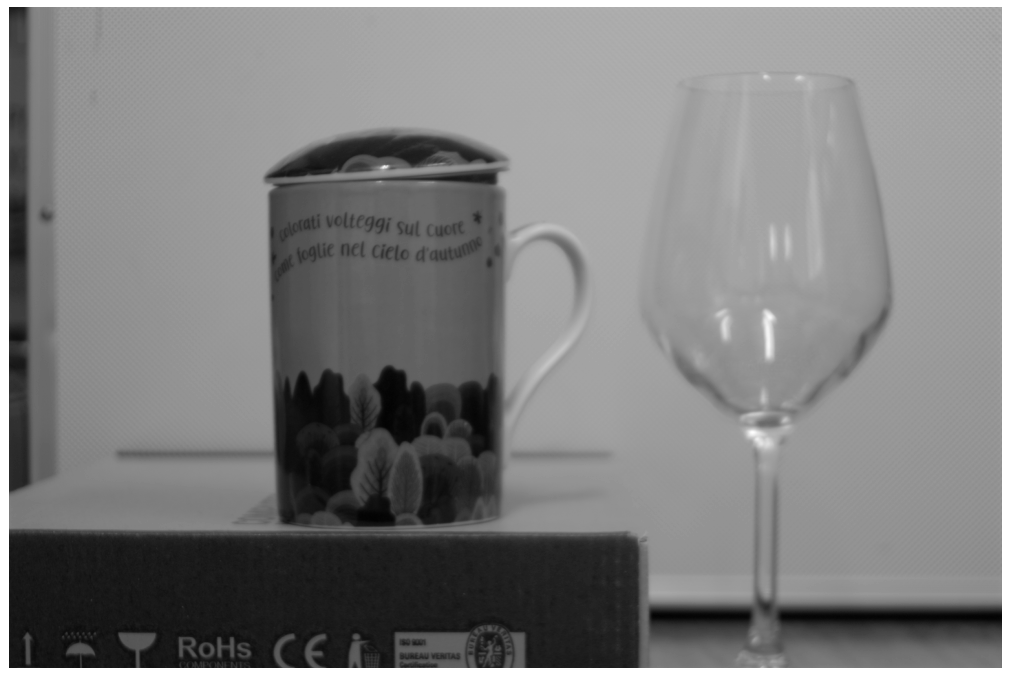

## Esercizio 2b - Mandelbrot

Esercizio ispirato da https://ipython-books.github.io/52-accelerating-pure-python-code-with-numba-and-just-in-time-compilation/

Un insieme di Mandelbrot (https://it.wikipedia.org/wiki/Insieme_di_Mandelbrot)  è definito come  l'insieme dei numeri complessi $c$ per i quali è limitata la successione definita da: 

$$
\left\{
\begin{aligned}
z_0 = 0;\\
z_{n+1} = z_n^2 + c.\\
\end{aligned}
\right.
$$

L'insieme ha una forma complessa il cui contorno è un frattale. 

Definendo $f_c(z)$ come:
$$
f_c(z) = z^2 +c
$$

possiamo anche definire $f_c^n(z)$ cme l'n-esima iterata di $f_c(z)$ ovvero $f_c(z)$ composta con se stezza $n$ volte. 
Ad esempio $f^3_c(z)$:
$$
f^3_c(z) = f_c(f_c(f_c(z))).
$$

Definendo $z_n$ come $f_c^n(0)$, si può dimostrare che se il modulo di $z_n$  è maggiore di 2  allora la successione divergerà e quindi il punto c $c$ sarà esterno all'insieme di Mandelbrot. 

Dal punto di vista matematico, l'insieme di Mandelbrot $M$ è  un semplice  insieme di numeri complessi a cui ogni  numero complesso $c$  può appartenere o meno. 
Una rappresentazione grafica rigorosa dell'insieme di Mandelbrot si ottiene colorando tutti i punti $c$ che appartengono a $M$ di nero e gli altri di bianco. 

La rappresentazione può divenire più interessante se, per i punti esterni all'insieme, si considera 
quanto velocemente la sequenza $|z_n|$ diverge all'infinito. Il minimo valore di $n$  per cui $| z_n | > 2$  è un indice di quanto distante sia un punto dall controno dell'insieme e può essere  utilizzato per la rappresentazione grafica a colori. 

I punti colorati nella rappresentazione dell'insieme  di Mandelbrot non appartengono all'insieme.

Nel nostro caso considereremo il numero di iterazioni per cui $| z_n | > 10$. 

### Funzione Mandelbrot

Per definire i punti appartenenti all'insieme di Mandelbrot e  velocità di divergenza si può partire dalla seguente funzione Python

In [1]:
def mandelbrot(size, iterations):
    """Pure Python Mandelbrot set calculation.
    
    Parameters:
        size : 
            Image size (number of values to evaluate is size*size)

        iterations : 
            Numer of terations for each value
    """
    
    m = np.zeros((size, size))
    for i in range(size):
        for j in range(size):
            c = (-2 + 3. / size * j +
                 1j * (1.5 - 3. / size * i))
            z = 0
            for n in range(iterations):
                if np.abs(z) <= 10:
                    z = z * z + c
                    m[i, j] = n
                else:
                    break
    return m

### Richieste

1. Studiare la funzione sopra definita;
2. Implementare uno script python che utilizzi un equivalente della suddetta funzione per generare un'immagine frattale in cui il colore è prporzionale al numero di iterazioni necessarie per stabilire la divergenza con modalità di esecuzione a scelta fra: 
    - puro codice python
    - compilazione JIT di Numba
    1. SUGGERIMENTO: esplorare i valori dell'opzione `norm` di `imshow` per il migliore risultato;
    2. SUGGERIMENTO: esplorare i valori dell'opzione `cmap` di `imshow` per visualizzare l'immagine
3. Variare i parametri `size` ed `iterations` e confrontare la velocità per le due modalità di esecuzione
4. Definire una nuova funzione `multibrot`, simile a `mandelbrot` ma  dove l'esponente può essere scelto  ($f_c(z) = z^k +c$) e ripetere i passi precedenti.    

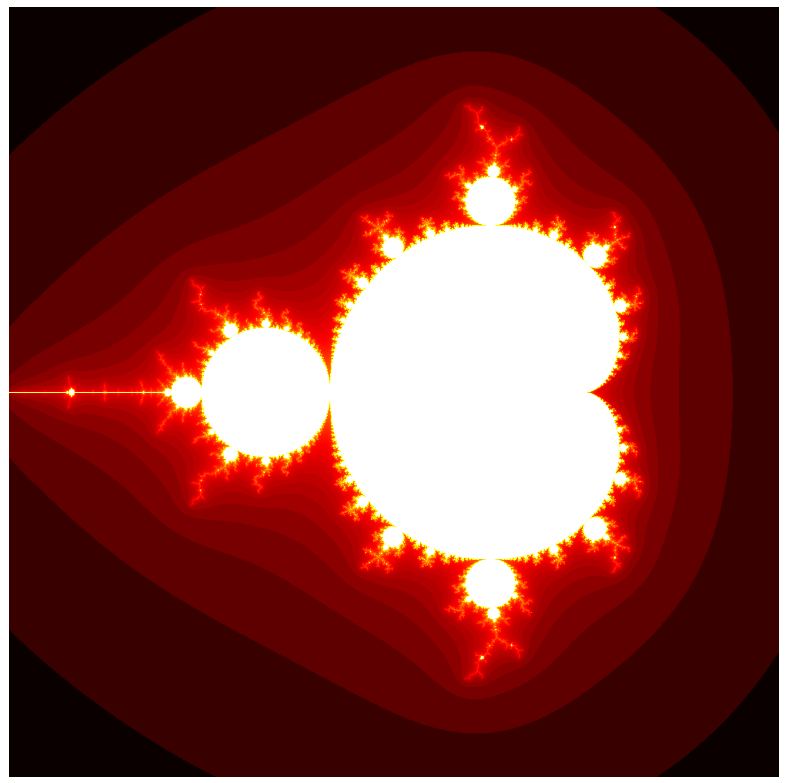